$\exists$ conjunto de soporte sobre el cual trabajo. Ej: linespace() o Valores discretos.

$h$ step para derivadas númericas (ideal: $h\to 0$)

$O$ = orden dominante/error de truncamiento. Eso quiere decir que $O(h^2)\to$ el mayor valor que sigue esta dado por orden $h^2$. Ej: $h=0.1\to O(h^2)=0.01$

Discretitación $x$-espaciada: Espacio discreto cuyos valores estan espaciados por un valor $h$.

Suponga que $\exists f(x)$ por lo tanto podemos construir el conjunto soporte como $\Omega=\lbrace(x_0,f(x_0)),(x_1,f(x_1)),(x_2,f(x_2)),...\rbrace$

Necesitamos que sea función (el sistema debe estar bien definido). $(x_j=x_0+jh) \to \forall i,j \in R, x_i \neq x_j \therefore \exists! f(x_j)  $

Usamos $lambda = f(x)$, redacción: $f_{name}= lambda x_{variable}: f(x)_{\lbrace definicion\ de\ la\ función\rbrace



In [1]:
%matplotlib notebook

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplit3d import Axes3D

In [28]:
n= int(1e4)
h=1/n
x=np.linspace(0,2*np.pi,n)
def f(x):
    return np.sin(x)
def derivada_numerica_progresiva(f,x,h):
    f_prime=((f(x+h)-f(x))/h)
    return f_prime
def f_prime(x):
    return np.cos(x)

<IPython.core.display.Javascript object>


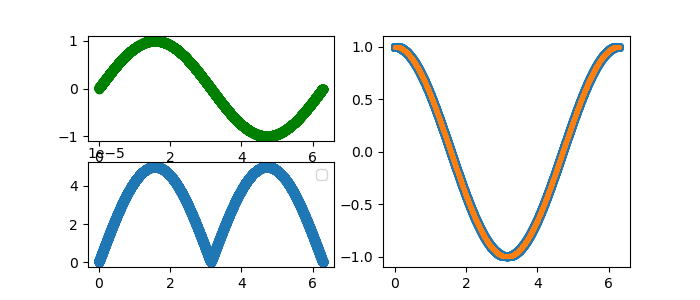

No handles with labels found to put in legend.


In [29]:
fig = plt.figure(figsize=(7,3))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(1,2,2)
ax3 = fig.add_subplot(2,2,3)


ax1.scatter(x,f(x),color="green", label="f(x)")
ax2.scatter(x,derivada_numerica_progresiva(f,x,h),label="f'(x) númerica",s=30)
ax2.scatter(x,f_prime(x),label="f'(x)",s=5)
ax3.scatter(x,np.abs(derivada_numerica_progresiva(f,x,h)-f_prime(x)))
plt.legend()
plt.show()

In [32]:
def derivada_numerica_regresiva(f,x,h):
    f_prime=((f(x)-f(x-h))/h)
    return f_prime

<IPython.core.display.Javascript object>


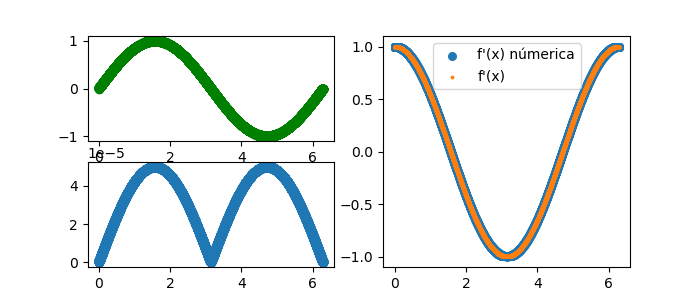

In [33]:
fig = plt.figure(figsize=(7,3))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(1,2,2)
ax3 = fig.add_subplot(2,2,3)

ax1.scatter(x,f(x),color="green", label="f(x)")
ax2.scatter(x,derivada_numerica_regresiva(f,x,h),label="f'(x) númerica",s=30)
ax2.scatter(x,f_prime(x),label="f'(x)",s=3)
ax3.scatter(x,np.abs(derivada_numerica_regresiva(f,x,h)-f_prime(x)))
ax2.legend()
plt.show()

In [36]:
def derivada_numerica_central(f,x,h):
    f_prime=((f(x+h)-f(x-h))/(2*h))
    return f_prime

<IPython.core.display.Javascript object>


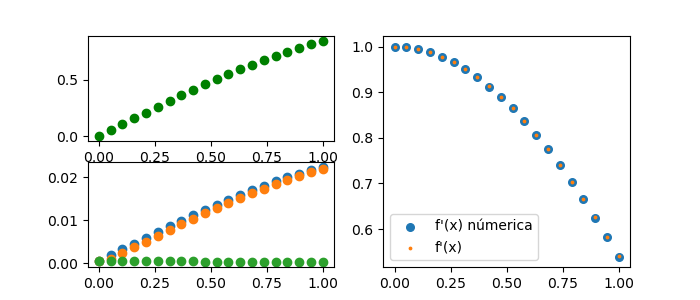

In [48]:
fig = plt.figure(figsize=(7,3))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(1,2,2)
ax3 = fig.add_subplot(2,2,3)

ax1.scatter(x,f(x),color="green", label="f(x)")
ax2.scatter(x,derivada_numerica_central(f,x,h),label="f'(x) númerica",s=30)
ax2.scatter(x,f_prime(x),label="f'(x)",s=3)
ax3.scatter(x,np.abs(derivada_numerica_progresiva(f,x,h)-f_prime(x)))
ax3.scatter(x,np.abs(derivada_numerica_regresiva(f,x,h)-f_prime(x)))
ax3.scatter(x,np.abs(derivada_numerica_central(f,x,h)-f_prime(x)))
ax2.legend()
plt.show()

In [54]:
n=20
x=np.linspace(0,1,n)
y=np.linspace(0,1,n)
h=x[1]-x[0] 
rq=[0.51,0.2]

In [55]:
def Potencial(x,y):
    return 1./np.sqrt( (x-rq[0])**2 + (y-rq[1])**2 )-1./np.sqrt( (x-rq[0])**2 + (y+rq[1])**2 )

In [56]:
X,Y=np.meshgrid(x,y)
V=Potencial(X,Y)

<IPython.core.display.Javascript object>


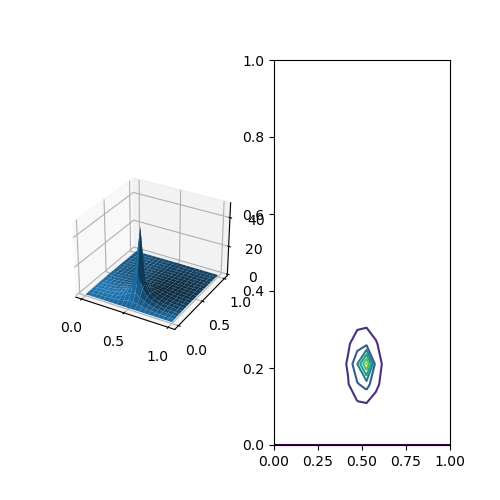

In [57]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,2,1,projection="3d")
ax1 = fig.add_subplot(1,2,2)
ax.plot_surface(X,Y,V)
ax1.contour(X,Y,V)

In [61]:
def Dx(f,x,y,h):
    return (f(x+h,y)-f(x-h,y))/(2*h)
def Dy(f,x,y,h):
    return (f(x,y+h)-f(x,y-h))/(2*h)

<IPython.core.display.Javascript object>


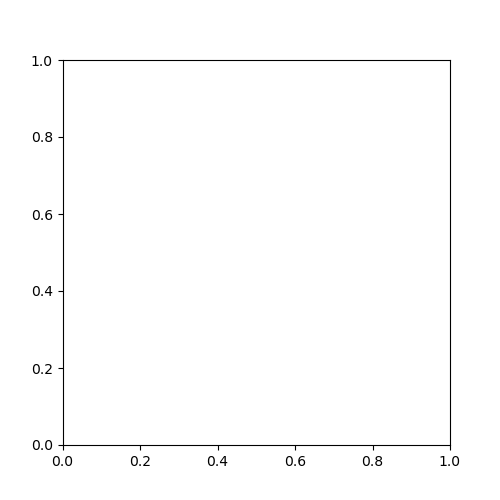

ValueError: Argument V has a size 20 which does not match 400, the number of arrow positions

In [69]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)

ax.quiver(Potencial(X,Y),Dx(Potencial,x,y,h),Dy(Potencial,x,y,h))